<a href="https://colab.research.google.com/github/rehanali455/rehanali455/blob/main/21_Rehan_Task_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


In [8]:
# Load images
img1 = cv2.imread("me_04.jpg", cv2.IMREAD_COLOR)  # Low-frequency image
img2 = cv2.imread("me_05.jpg", cv2.IMREAD_COLOR)  # Low-frequency image

# # Check if images are loaded
if img1 is None:
    raise FileNotFoundError("me_04.jpg not found or could not be loaded.")
if img2 is None:
    raise FileNotFoundError("profileME.png not found or could not be loaded.")

In [9]:
# Resize img2 to match the dimensions of img1
rows, cols, _ = img1.shape
img2 = cv2.resize(img2, (cols, rows))


In [10]:
# Low-pass filter on img1
low_pass = cv2.GaussianBlur(img1, (31, 31), 0)

# High-pass filter on img2
blurred = cv2.GaussianBlur(img2, (31, 31), 0)  # Blur img2
high_pass = cv2.subtract(img2, blurred)        # Subtract blurred from original


In [11]:
# Blend low-pass and high-pass images
hybrid_image = cv2.addWeighted(low_pass, 0.5, high_pass, 0.5, 0)


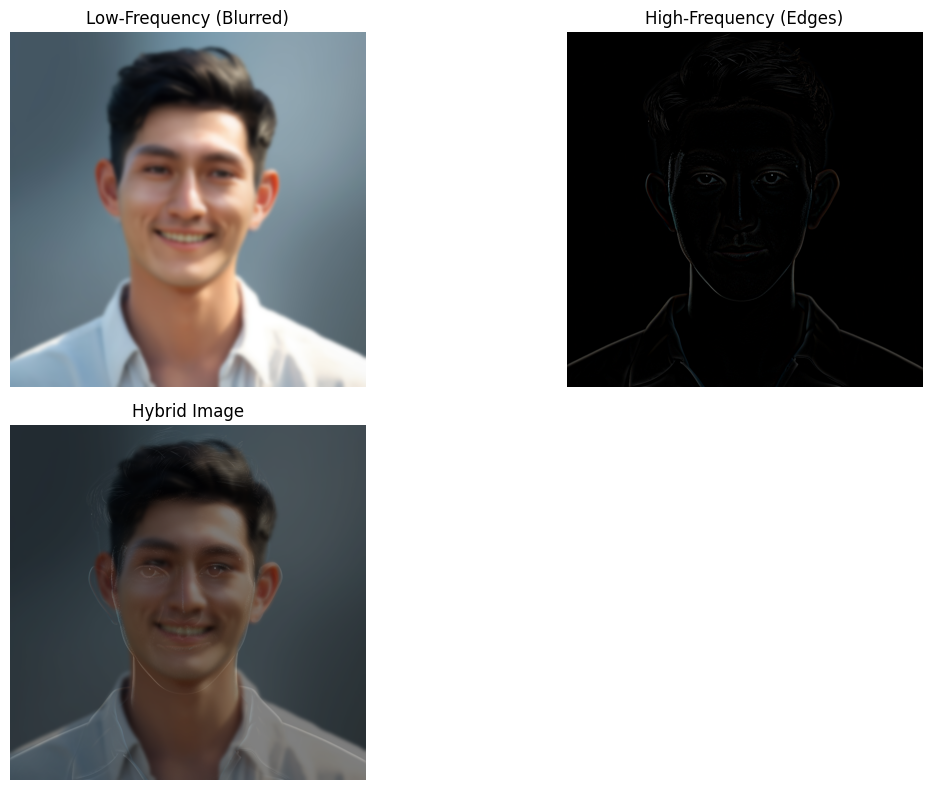

In [12]:
# Plot the images
plt.figure(figsize=(12, 8))

# Low-frequency image
plt.subplot(2, 2, 1)
plt.title("Low-Frequency (Blurred)")
plt.imshow(cv2.cvtColor(low_pass, cv2.COLOR_BGR2RGB))
plt.axis("off")

# High-frequency image
plt.subplot(2, 2, 2)
plt.title("High-Frequency (Edges)")
plt.imshow(cv2.cvtColor(high_pass, cv2.COLOR_BGR2RGB))
plt.axis("off")

# Hybrid image
plt.subplot(2, 2, 3)
plt.title("Hybrid Image")
plt.imshow(cv2.cvtColor(hybrid_image, cv2.COLOR_BGR2RGB))
plt.axis("off")

plt.tight_layout()
plt.show()


In [13]:
cv2.imwrite("Hybrid_Image.jpg", hybrid_image)
from google.colab import files
files.download("Hybrid_Image.jpg")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>